# Bernstein-Vazirani Algorithm

## **Classical Implementation**

In [10]:
def secretFunction(guess):
    s = "101011"
    dotP = 0
    for ii in range(len(s)):
        dotP = (dotP + int(s[ii])*int(guess[ii]))%2
    return dotP

In [13]:
guess = "001101"
print(secretFunction(guess))

0


In [14]:
for i in range(6):
    guess=""
    for j in range(6):
        if(i==j):
            guess+="1"
        else:
            guess+= "0"
    print(secretFunction(guess))    

1
0
1
0
1
1


## **Quantum Solution**

In [4]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [15]:
def secretFunction(qc):
    s = "100011"
    for ii, yesno in enumerate(reversed(s)):
        if yesno == '1': 
            qc.cx(ii, 6)

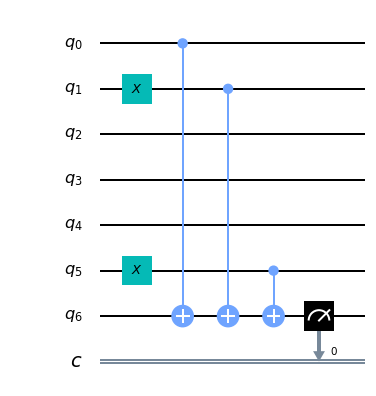

In [16]:
cirGuess = QuantumCircuit(7,1)
cirGuess.x(5)
#cirGuess.x(0)
cirGuess.x(1)
secretFunction(cirGuess)
cirGuess.measure(6,0)
cirGuess.draw(output = 'mpl')

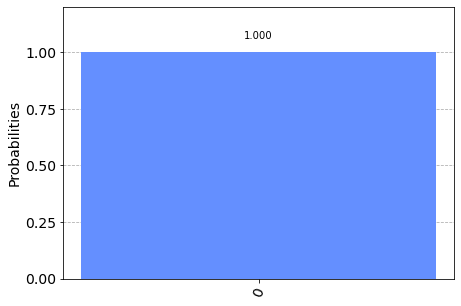

In [17]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(cirGuess, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(cirGuess))

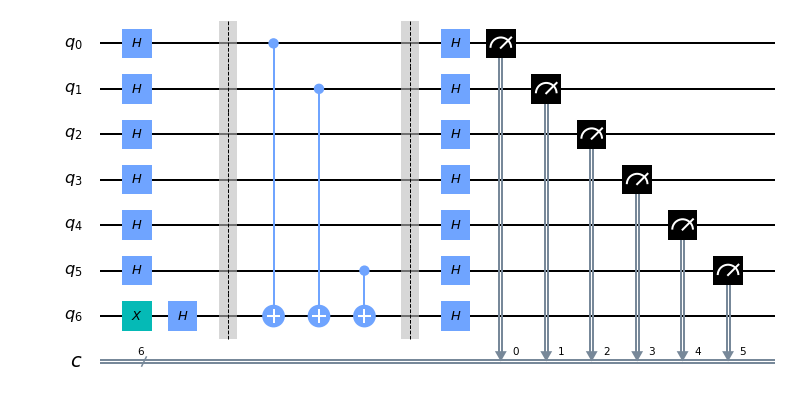

In [18]:
circuit = QuantumCircuit(7,6)
circuit.x(6)
circuit.h(range(7))
circuit.barrier()
secretFunction(circuit)
circuit.barrier()
circuit.h(range(7))
circuit.measure(range(6),range(6))
circuit.draw(output='mpl')


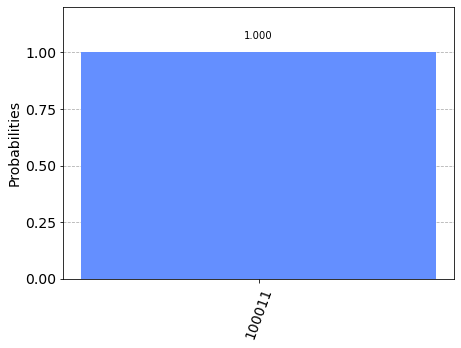

In [19]:

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))